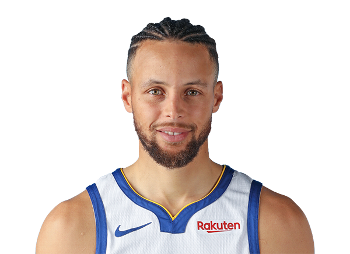

# IMPORTING LIBRARIES

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading data

In [103]:
df=pd.read_csv("bb.csv")
df

,DATE,OPP,MIN,FG%,3P%,FT%,REB,AST,BLK,STL,PF,TO,PTS,Score,RESULT
0,Fri 2/5,@DAL,30,52.9,40.0,100.0,3,6,0,0,2,2,28,147-116,W
1,Wed 2/3,vsBOS,38,57.1,50.0,100.0,11,8,0,3,0,3,38,111-107,L
2,Sun 1/31,vsDET,30,64.7,75.0,0.0,5,7,0,2,1,6,28,118-91,W
3,Fri 1/29,@PHX,31,50.0,50.0,100.0,4,4,0,0,2,4,27,114-93,L
4,Thu 1/28,vsMIN,33,35.3,36.4,0.0,6,8,0,0,2,2,16,123-111,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Thu 10/25,vsWSH,32,62.5,68.8,100.0,4,3,1,0,1,2,51,144-122,W
89,Tue 10/23,vsPHX,30,61.1,46.2,50.0,4,8,0,2,0,3,29,123-103,W
90,Mon 10/22,@DEN,39,43.5,37.5,100.0,4,6,0,0,4,2,30,100-98,L
91,Sat 10/20,@UTAH,37,54.2,55.6,0.0,4,8,0,2,2,4,31,124-123,W


In [104]:
df=df.drop(['DATE'],axis=1)

In [105]:
import nltk

In [106]:
from sklearn import preprocessing
leb = preprocessing.LabelEncoder()


In [107]:
df.OPP=df.OPP.replace(['vsBOS', 'vsCHA', 'vsCHI', 'vsCLE', 'vsDEN', 'vsDET', 'vsHOU', 'vsIND', 'vsLAC', 'vsLAL', 'vsLEB*', 'vsMEM', 'vsMIA', 'vsMIL', 'vsMIN', 'vsNO', 'vsNY', 'vsOKC', 'vsPHI', 'vsPHX', 'vsPOR', 'vsSA', 'vsSAC', 'vsTOR', 'vsUTAH', 'vsWSH'], 
                      ['BOS', 'CHA', 'CHI', 'CLE', 'DEN', 'DET', 'HOU', 'IND', 'LAC', 'LAL', 'LEB', 'MEM', 'MIA', 'MIL', 'MIN', 'NO', 'NY', 'OKC', 'PHI', 'PHX', 'POR', 'SA', 'SAC', 'TOR', 'UTAH', 'WSH'])


In [108]:
df.OPP=df.OPP.replace(['@ATL', '@BKN', '@BOS', '@CHA', '@CHI', '@CLE', '@DAL', '@DEN', '@DET', '@HOU', '@IND', '@LAC', '@LAL', '@MEM', '@MIA', '@MIL', '@MIN', '@NO', '@NY', '@OKC', '@ORL', '@PHI', '@PHX', '@POR', '@SA', '@SAC', '@UTAH', '@WSH'],
                      ['ATL', 'BKN', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NO', 'NY', 'OKC', 'ORL', 'PHI', 'PHX', 'POR', 'SA', 'SAC', 'UTAH', 'WSH'])

In [109]:
x=np.sort(df.OPP.unique())
x=list(x)
print(x)

['ATL', 'BKN', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'HOU', 'IND', 'LAC', 'LAL', 'LEB', 'MEM', 'MIA', 'MIL', 'MIN', 'NO', 'NY', 'OKC', 'ORL', 'PHI', 'PHX', 'POR', 'SA', 'SAC', 'TOR', 'UTAH', 'WSH', 'vsDAL']


In [110]:
df

,OPP,MIN,FG%,3P%,FT%,REB,AST,BLK,STL,PF,TO,PTS,Score,RESULT
0,DAL,30,52.9,40.0,100.0,3,6,0,0,2,2,28,147-116,W
1,BOS,38,57.1,50.0,100.0,11,8,0,3,0,3,38,111-107,L
2,DET,30,64.7,75.0,0.0,5,7,0,2,1,6,28,118-91,W
3,PHX,31,50.0,50.0,100.0,4,4,0,0,2,4,27,114-93,L
4,MIN,33,35.3,36.4,0.0,6,8,0,0,2,2,16,123-111,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,WSH,32,62.5,68.8,100.0,4,3,1,0,1,2,51,144-122,W
89,PHX,30,61.1,46.2,50.0,4,8,0,2,0,3,29,123-103,W
90,DEN,39,43.5,37.5,100.0,4,6,0,0,4,2,30,100-98,L
91,UTAH,37,54.2,55.6,0.0,4,8,0,2,2,4,31,124-123,W


In [111]:
leb.fit(df['RESULT'].unique())
df['RESULT']=leb.transform(df['RESULT'])

In [112]:
leb.fit(df['OPP'].unique())
df['OPP']=leb.transform(df['OPP'])

In [113]:
df

,OPP,MIN,FG%,3P%,FT%,REB,AST,BLK,STL,PF,TO,PTS,Score,RESULT
0,6,30,52.9,40.0,100.0,3,6,0,0,2,2,28,147-116,1
1,2,38,57.1,50.0,100.0,11,8,0,3,0,3,38,111-107,0
2,8,30,64.7,75.0,0.0,5,7,0,2,1,6,28,118-91,1
3,23,31,50.0,50.0,100.0,4,4,0,0,2,4,27,114-93,0
4,17,33,35.3,36.4,0.0,6,8,0,0,2,2,16,123-111,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,29,32,62.5,68.8,100.0,4,3,1,0,1,2,51,144-122,1
89,23,30,61.1,46.2,50.0,4,8,0,2,0,3,29,123-103,1
90,7,39,43.5,37.5,100.0,4,6,0,0,4,2,30,100-98,0
91,28,37,54.2,55.6,0.0,4,8,0,2,2,4,31,124-123,1


In [114]:
df=df.drop(['Score'],axis=1)

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [116]:
target=df['RESULT']
df=df.drop(['RESULT'],axis=1)

In [117]:
df

,OPP,MIN,FG%,3P%,FT%,REB,AST,BLK,STL,PF,TO,PTS
0,6,30,52.9,40.0,100.0,3,6,0,0,2,2,28
1,2,38,57.1,50.0,100.0,11,8,0,3,0,3,38
2,8,30,64.7,75.0,0.0,5,7,0,2,1,6,28
3,23,31,50.0,50.0,100.0,4,4,0,0,2,4,27
4,17,33,35.3,36.4,0.0,6,8,0,0,2,2,16
...,...,...,...,...,...,...,...,...,...,...,...,...
88,29,32,62.5,68.8,100.0,4,3,1,0,1,2,51
89,23,30,61.1,46.2,50.0,4,8,0,2,0,3,29
90,7,39,43.5,37.5,100.0,4,6,0,0,4,2,30
91,28,37,54.2,55.6,0.0,4,8,0,2,2,4,31


In [118]:
X=np.array(df)
y=np.array(target)

In [119]:
df2=pd.read_csv("test.csv")
df2

,OPP,MIN,FG%,3P%,FT%,REB,AST,BLK,STL,PF,TO,PTS,RESULT
0,vsCLE,30.0,68.4,63.6,100.0,2.0,6.0,0.0,0.0,0.0,1.0,36.0,W
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,vsBKN,34.0,58.8,22.2,100.0,3.0,5.0,0.0,0.0,2.0,4.0,27.0,L
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,vsORL,37.0,53.8,52.6,100.0,8.0,5.0,0.0,4.0,1.0,6.0,40.0,W
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,@SA,32.0,55.0,40.0,75.0,4.0,2.0,0.0,0.0,1.0,1.0,32.0,W
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,@SA,36.0,58.8,54.5,100.0,7.0,6.0,0.0,1.0,1.0,1.0,32.0,L
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
df2=df2.dropna()
df2

,OPP,MIN,FG%,3P%,FT%,REB,AST,BLK,STL,PF,TO,PTS,RESULT
0,vsCLE,30.0,68.4,63.6,100.0,2.0,6.0,0.0,0.0,0.0,1.0,36.0,W
2,vsBKN,34.0,58.8,22.2,100.0,3.0,5.0,0.0,0.0,2.0,4.0,27.0,L
4,vsORL,37.0,53.8,52.6,100.0,8.0,5.0,0.0,4.0,1.0,6.0,40.0,W
6,@SA,32.0,55.0,40.0,75.0,4.0,2.0,0.0,0.0,1.0,1.0,32.0,W
8,@SA,36.0,58.8,54.5,100.0,7.0,6.0,0.0,1.0,1.0,1.0,32.0,L
10,@DAL,37.0,61.3,57.9,100.0,2.0,5.0,0.0,1.0,3.0,3.0,57.0,L


In [121]:
df2.OPP=df2.OPP.replace(['@ATL', '@BKN', '@BOS', '@CHA', '@CHI', '@CLE', '@DAL', '@DEN', '@DET', '@HOU', '@IND', '@LAC', '@LAL', '@MEM', '@MIA', '@MIL', '@MIN', '@NO', '@NY', '@OKC', '@ORL', '@PHI', '@PHX', '@POR', '@SA', '@SAC', '@UTAH', '@WSH'],
                      ['ATL', 'BKN', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NO', 'NY', 'OKC', 'ORL', 'PHI', 'PHX', 'POR', 'SA', 'SAC', 'UTAH', 'WSH'])

In [122]:
df2.OPP=df2.OPP.replace(['vsBOS','vsBKN','vsORL', 'vsCHA', 'vsCHI', 'vsCLE', 'vsDEN', 'vsDET', 'vsHOU', 'vsIND', 'vsLAC', 'vsLAL', 'vsLEB*', 'vsMEM', 'vsMIA', 'vsMIL', 'vsMIN', 'vsNO', 'vsNY', 'vsOKC', 'vsPHI', 'vsPHX', 'vsPOR', 'vsSA', 'vsSAC', 'vsTOR', 'vsUTAH', 'vsWSH'], 
                      ['BOS', 'BKN','ORL','CHA', 'CHI', 'CLE', 'DEN', 'DET', 'HOU', 'IND', 'LAC', 'LAL', 'LEB', 'MEM', 'MIA', 'MIL', 'MIN', 'NO', 'NY', 'OKC', 'PHI', 'PHX', 'POR', 'SA', 'SAC', 'TOR', 'UTAH', 'WSH'])


# LAbeling the attributes

In [123]:
df2['OPP']=leb.transform(df2['OPP'])

In [124]:
leb.fit(df2['RESULT'].unique())
df2['RESULT']=leb.transform(df2['RESULT'])


In [125]:
trueY=df2['RESULT']
df2=df2.drop(['RESULT'],axis=1)

In [126]:
df2

,OPP,MIN,FG%,3P%,FT%,REB,AST,BLK,STL,PF,TO,PTS
0,5,30.0,68.4,63.6,100.0,2.0,6.0,0.0,0.0,0.0,1.0,36.0
2,1,34.0,58.8,22.2,100.0,3.0,5.0,0.0,0.0,2.0,4.0,27.0
4,21,37.0,53.8,52.6,100.0,8.0,5.0,0.0,4.0,1.0,6.0,40.0
6,25,32.0,55.0,40.0,75.0,4.0,2.0,0.0,0.0,1.0,1.0,32.0
8,25,36.0,58.8,54.5,100.0,7.0,6.0,0.0,1.0,1.0,1.0,32.0
10,6,37.0,61.3,57.9,100.0,2.0,5.0,0.0,1.0,3.0,3.0,57.0


In [127]:
X2=np.array(df2)
y2=np.array(trueY)


In [132]:
clf = LogisticRegression()
clf.fit(X, y)
clf.predict(X2)
clf.predict_proba(X2)
x=clf.score( X2, y2)
clf.coef_


print('score is ',x*100,'%')
print('')
print('weights are')
print(clf.coef_)

score is  66.66666666666666 %

weights are
[[-0.00368902 -0.07514397 -0.00548451  0.06565844  0.00123588  0.07423582
   0.04967522  0.36021892  0.09115418  0.09693953 -0.17129615  0.00370886]]


In [133]:
print(clf.predict(X2))

[1 0 1 1 1 1]


In [134]:
y2

array([1, 0, 1, 1, 0, 0])